In [1]:
import sys
import os
import binascii
import base64
import numpy as np
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
import itertools
import os.path
from matplotlib.ticker import ScalarFormatter
import matplotlib as mplab

In [5]:

## Ground floor, First floor, Same Floor, Third Floor, Fourth Floor
rssi = [[-91.18722497171137,-89.51034524975515,-87.8491866287725],  [-102.51832456793746,-98.02593736487738,-98.25654436952253],     [-101.41390638782583,-101.13545715581078,-98.8995798551606]]
rssi_dev = [ [3.528720898474599,3.344209443341488,4.014616339238931], [2.4393208973928933,3.042580929935491,2.9859452462649725], [2.4835499641251295,2.102977840829103,3.825254442798962]]
ber = [[0.0251694915254,0.101793785311,0.00471751412429], [6.94444444444e-06,6.94444444444e-06,3.53107344633e-05],  [6.94444444444e-06,6.94444444444e-06,6.94444444444e-06], [0.0384957627119,0.0105720338983,0.0143714689266]]

rssi_final = []
rssi_dev_final = []
ber_final = []
ber_dev = []

for x in rssi:
	rssi_final.append( np.mean(x))
for x in rssi_dev:
	rssi_dev_final.append( np.mean(x))
for x in ber:
	ber_final.append( np.mean(x))
	ber_dev.append(np.std(x))

In [9]:
len(rssi_final)

3

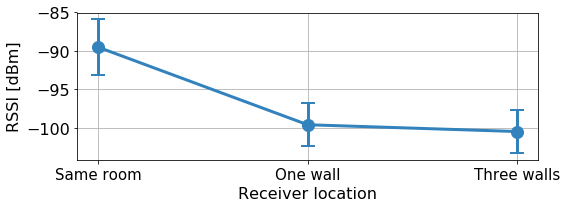

In [22]:

mplab.rc('xtick', labelsize=16) 
mplab.rc('ytick', labelsize=16) 

axis1 = [0,1,2]

plt.figure(figsize=(8, 3))

axes = plt.gca()

#plt.ylim([0,1.3])


plt.ylabel('RSSI [dBm]', fontsize=16)
plt.xlabel('Receiver location', fontsize=16)

indexlabels = ["Same room",  "One wall", "Three walls"]

plt.xticks( axis1, indexlabels, fontsize=15)


(_, caps, _) = plt.errorbar(axis1, rssi_final, yerr=(rssi_dev_final), color='#3182bd', marker='o', linestyle='-', markersize=12, linewidth=3, capsize = 7, label='Daylight desk')
for cap in caps:
    cap.set_markeredgewidth(2)
#plt.errorbar(axis1,ackrate_daylight_floor_result, yerr=(ackrate_daylight_floor_deviation) ,color='m', marker='.', linestyle='-.', markersize=12, linewidth=3, label='Daylight floor')
#plt.plot(rssi_final)

axes = plt.gca()

#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), 
 #          ncol=2, mode="expand", borderaxespad=0. ,prop={'size':16})

#plt.legend(loc='upper right', prop={'size':16})

plt.subplots_adjust(left=0.15,bottom=0.21)
plt.grid(True)
plt.tight_layout()
plt.savefig('oscillator_rssi.pdf')

plt.show()


#print ber_final